In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier , AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgbm
import catboost as cb

from imblearn.over_sampling import SMOTE,SMOTEN

In [320]:
telco = pd.read_csv(r'F:\01_Dataset\04 Tabular\04 Customer Churn Prediction\01 Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [321]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <font color=green>DEMOGRAPHICS</font>
<br>


**CustomerID**: A unique ID that identifies each customer.

**Gender**: The customer’s gender: Male, Female

**Senior Citizen**: Indicates if the customer is 65 or older: Yes, No

**Partner** : Whether the customer has a partner or not Yes, No

**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc

<br>

## <font color=blue>SERVICES</font>

**Tenure**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL (Digital Subscriber Line), Fiber Optic, Cable.

**Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection** : Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

In [322]:
for i in telco.columns:
    print(i)
    print(telco[i].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

## PART I : DATA CLEANSING

In [323]:
# Convert As Workds
telco['SeniorCitizen'] = telco['SeniorCitizen'].replace({0:'No',1:'Yes'})

#Clean the wrong word
telco['MultipleLines'] = telco['SeniorCitizen'].replace({'No phone service':'No'})
telco['OnlineSecurity'] = telco['OnlineSecurity'].replace({'No internet service':'No'})
telco['OnlineBackup'] = telco['OnlineBackup'].replace({'No internet service':'No'})
telco['DeviceProtection'] = telco['DeviceProtection'].replace({'No internet service':'No'})
telco['TechSupport'] = telco['TechSupport'].replace({'No internet service':'No'})
telco['StreamingTV'] = telco['StreamingTV'].replace({'No internet service':'No'})
telco['StreamingMovies'] = telco['StreamingMovies'].replace({'No internet service':'No'})
telco['PaymentMethod'] = telco['PaymentMethod'].replace({'Bank transfer (automatic)':'Bank Transfer',
                                                         'Credit card (automatic)':'Credit Card'})

#Remove ' '
telco = telco[telco['TotalCharges'] != ' ']
telco['TotalCharges'] = telco['TotalCharges'].astype('float')

In [324]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## PART II EXPLORATORY DATA ANALYSIS

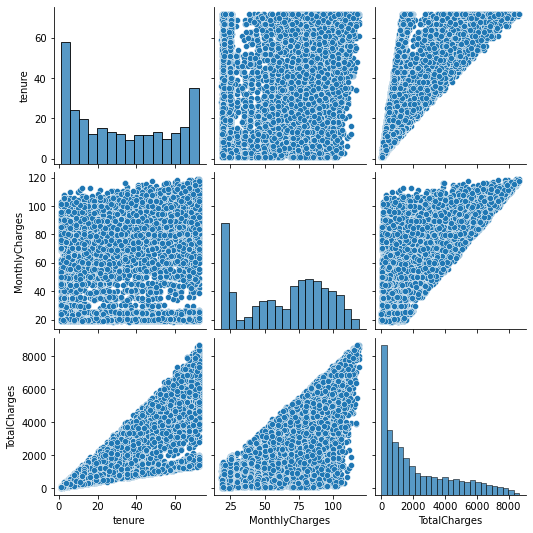

In [325]:
sns.pairplot(telco)

#### Correlation Analysis

In [326]:
telco.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


In [327]:
def visualize(feature):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10),sharey='row')
    sns.boxplot(ax=axes[0][0],x='Churn',y='MonthlyCharges',data=telco,hue=feature)
    sns.boxplot(ax=axes[0][1],x='Churn',y='tenure',data=telco,hue=feature)
    sns.countplot(ax=axes[1][0],x=feature,data=telco[telco['Churn'] == 'No'])
    sns.countplot(ax=axes[1][1],x=feature,data=telco[telco['Churn'] == 'Yes'])
    ax=axes[1][0].set_title('Churn = No')
    ax=axes[1][1].set_title('Churn = Yes')
    
def visualize2(feature):
    fig, axes = plt.subplots(len(feature),2,figsize=(15,100))
    for i in range(len(feature)):
        sns.boxplot(ax=axes[i][0],x='Churn',y='MonthlyCharges',data=telco,hue=feature[i])
        sns.boxplot(ax=axes[i][1],x='Churn',y='tenure',data=telco,hue=feature[i])
        ax=axes[i][0].set_title("Monthly Charges by Churn Type and "+ feature[i])
        ax=axes[i][1].set_title("Tenure by Churn Type and "+ feature[i])
        
def visualize3(feature):
    fig, axes = plt.subplots(len(feature),2,figsize=(15,100),sharey=True)
    telnochurn = telco[telco['Churn'] == 'No']
    telchurn = telco[telco['Churn'] == 'Yes']
    for i in range(len(feature)):
        tel = telco[[feature[i],'Churn']].value_counts(normalize=True).unstack()
        tel1 = pd.DataFrame(tel['No'])
        tel2 = pd.DataFrame(tel['Yes'])
        sns.barplot(x=tel1.index,y='No',data=tel1,ax=axes[i][0])
        sns.barplot(x=tel2.index,y='Yes',data=tel2,ax=axes[i][1])
        ax=axes[i][0].set_title("Probability of Retention by "+ feature[i])
        ax=axes[i][1].set_title("Probability of Churn by " + feature[i])
        ax=axes[i][0].set_xlabel(feature[i])
        ax=axes[i][1].set_xlabel(feature[i])
        ax=axes[i][0].set_ylabel('%')
        ax=axes[i][1].set_ylabel('%')

def Churnfinder(list,numb):
    classes = {'Yes':'Churn','No':'Retention'}
    a = telco[[list[0],'Churn']].value_counts(normalize=True).unstack()
    a.index = [list[0] + '_' + a.index[j] for j in range(a.shape[0])]
    alldata = a
    for i in range(1,len(list)):
        b = telco[[list[i],'Churn']].value_counts(normalize=True).unstack()
        b.index = [list[i] + '_' + b.index[j] for j in range(b.shape[0])]
        alldata = alldata.append(b)
    c = alldata.sort_values(by='Yes',ascending=False)
    c = pd.DataFrame(c['Yes'][:numb])
    d = alldata.sort_values(by='No',ascending=False)
    d = pd.DataFrame(d['No'][:numb])
    #return c
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5),sharey=True)
    ax1.bar(c.index,c['Yes'])
    ax2.bar(d.index,d['No'],color='g')
    ax1.set_xlabel('Feature')
    ax1.set_ylabel('Probability')
    ax2.set_xlabel('Feature')
    ax2.set_ylabel('Probability')
    ax1.set_title('Probability of Churn by feature')
    ax2.set_title('Probability of Retention by feature')
    ax1.tick_params(axis='x', labelrotation=90)
    ax2.tick_params(axis='x', labelrotation=90)
    
    
        
telco_object = telco.select_dtypes('object')
telco_object = telco_object.drop(['Churn','customerID'],axis=1)
telco_col = telco_object.columns

#### Monthly Service, Tenure and Frequency of Internet Service and Gender 

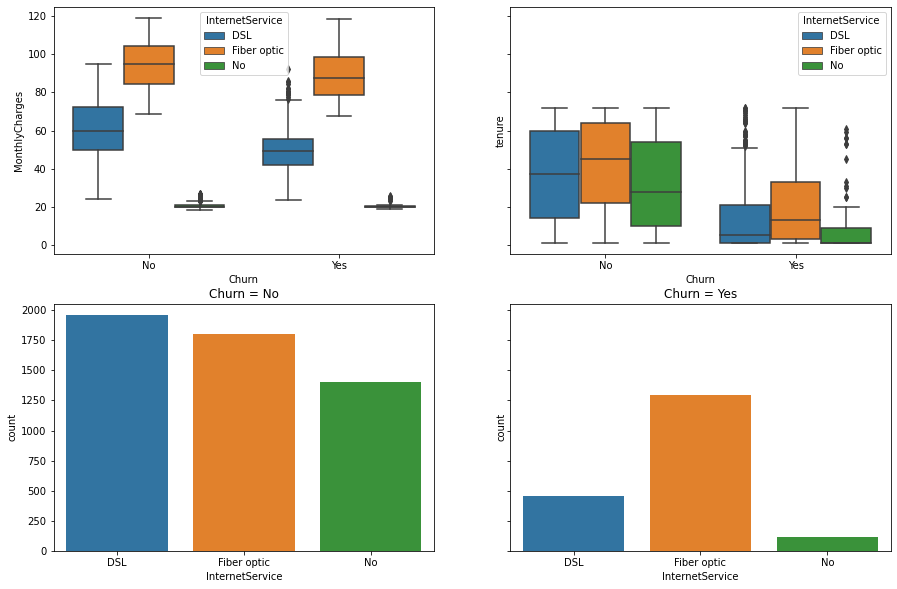

In [328]:
visualize('InternetService')

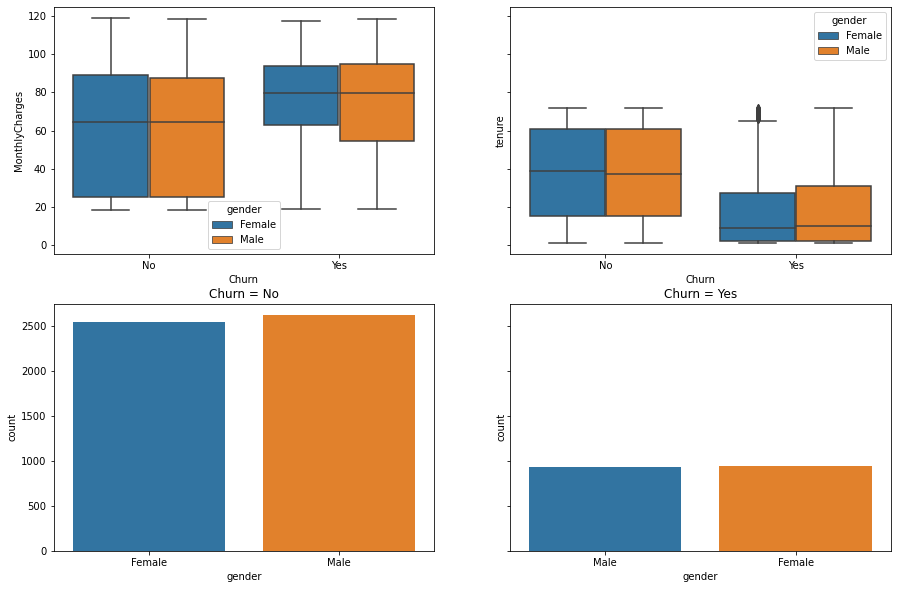

In [329]:
visualize('gender')

#### Monthly Chrage and Tenure by each attribute

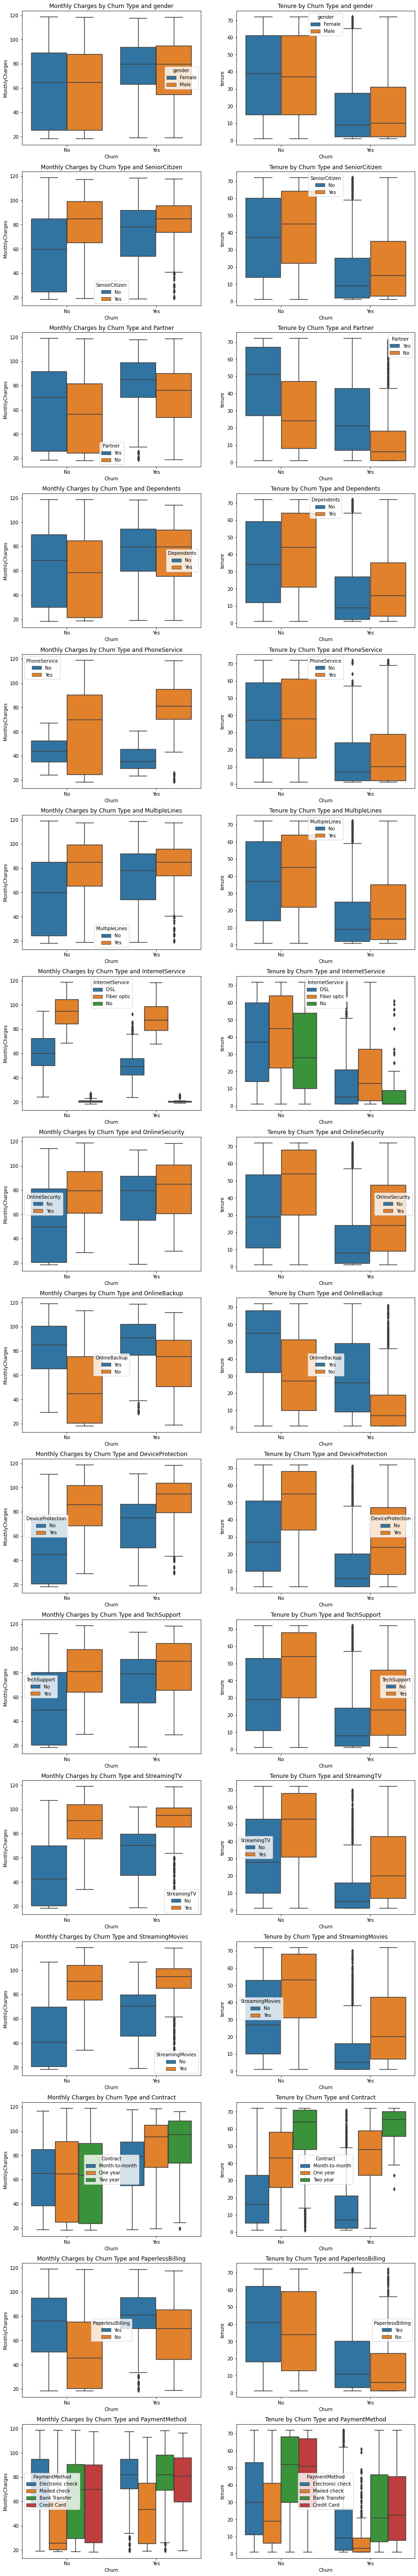

In [330]:
visualize2(telco_col)

#### Probability of Churn and Retention by each attribute

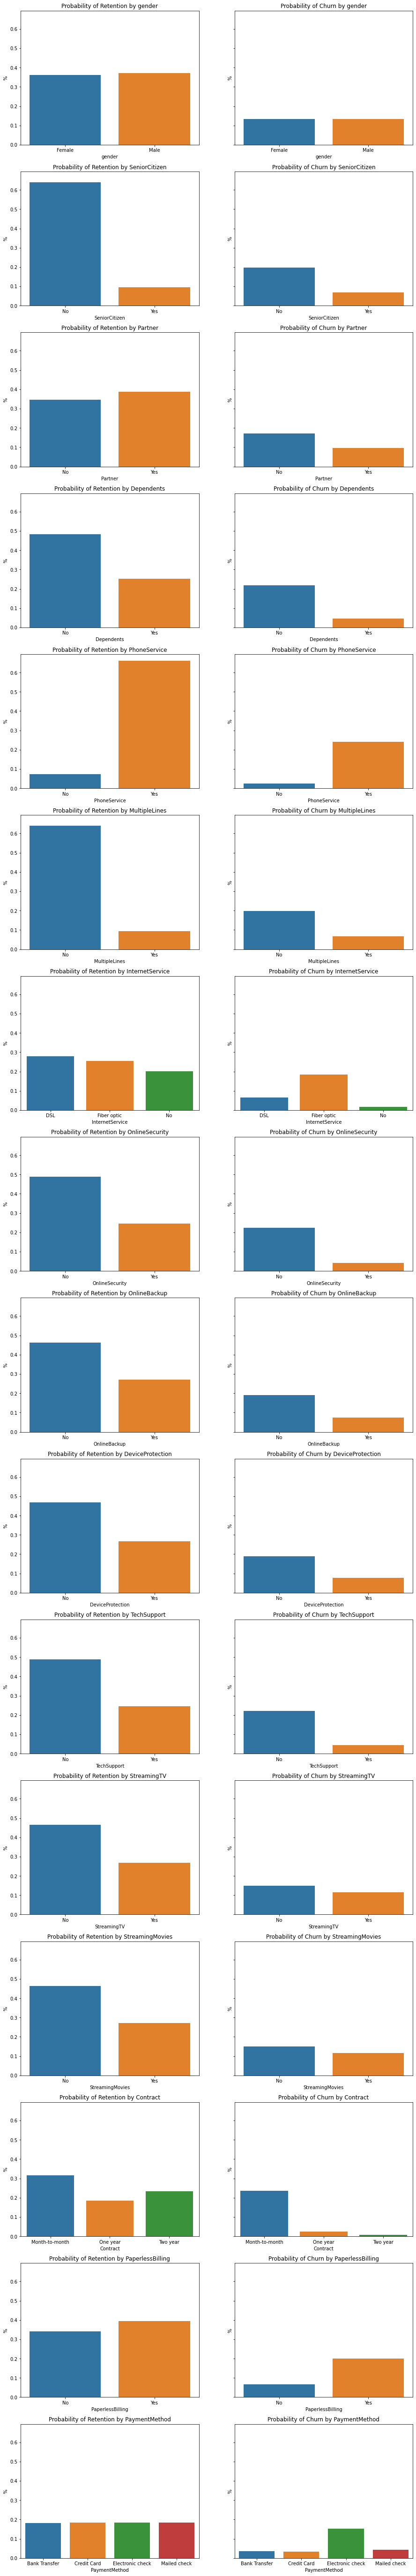

In [331]:
visualize3(telco_col)

#### Probility of Churn & Retention by Feaure

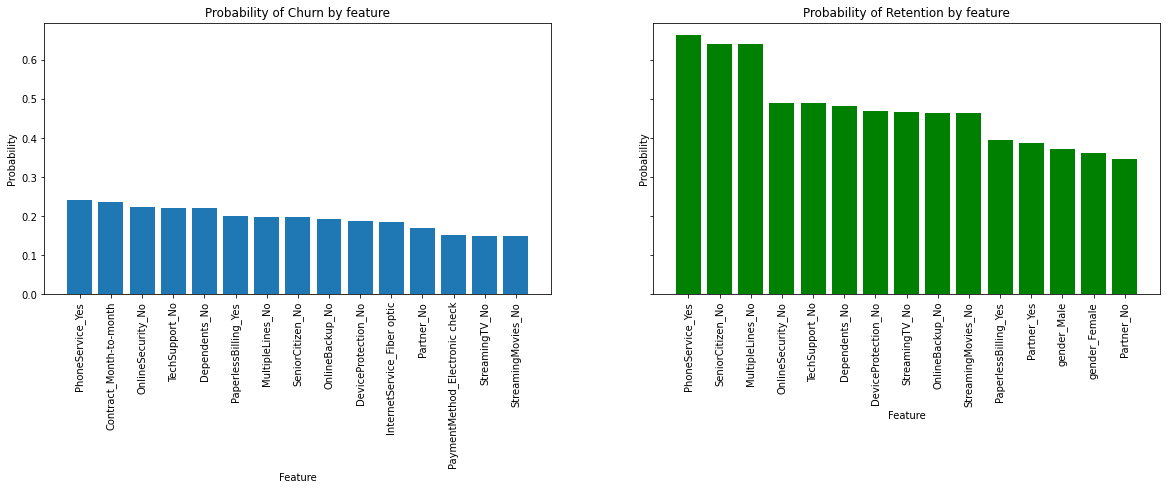

In [332]:
Churnfinder(telco_col,15)

### PART III : DATA PROCESSING

In [333]:
#gender was shown obviously as insignificant parameter for churn classification.
#Total charge was highly correlated to tenure so i decided to delete it out for model training.
telco_df = telco.drop(['customerID','gender','TotalCharges'],axis=1)
telco_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,No
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [334]:
yn_classes = {'Yes':1,'No':0}
yes_no = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in yes_no:
    telco_df[i] = telco_df[i].replace(yn_classes)

telco_df['InternetService'] = telco_df['InternetService'].replace({'DSL':0, 'Fiber optic':1, 'No':2})
telco_df['Contract'] = telco_df['Contract'].replace({'Month-to-month':0,'One year':1,'Two year':2})
telco_df['PaymentMethod'] = telco_df['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank Transfer':2,'Credit Card':3})

In [335]:
telco_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,29.85,0
1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,0
2,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,1
3,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,1


In [336]:
for i in telco_df.columns:
    print(i)
    print(telco_df[i].unique())

SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
[0 1]
MultipleLines
[0 1]
InternetService
[0 1 2]
OnlineSecurity
[0 1]
OnlineBackup
[1 0]
DeviceProtection
[0 1]
TechSupport
[0 1]
StreamingTV
[0 1]
StreamingMovies
[0 1]
Contract
[0 1 2]
PaperlessBilling
[1 0]
PaymentMethod
[0 1 2 3]
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn
[0 1]


In [337]:
telco_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,29.85,0
1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,0
2,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,1
3,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,0,0,1,0,1,1,1,1,1,1,1,84.80,0
7039,0,1,1,72,1,0,1,0,1,1,0,1,1,1,1,3,103.20,0
7040,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,0,29.60,0
7041,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,1


In [338]:
telco_df = telco_df.reset_index()

In [339]:
telco_df

,index,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,0
2,2,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,1
3,3,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,0
4,4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,1,1,24,1,0,0,1,0,1,1,1,1,1,1,1,84.80,0
7028,7039,0,1,1,72,1,0,1,0,1,1,0,1,1,1,1,3,103.20,0
7029,7040,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,0,29.60,0
7030,7041,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,1


In [340]:
X = telco_df.drop(['Churn','index'],axis=1)
y = telco_df['Churn']

#scaling
mmsc = MinMaxScaler(feature_range=(0,1))
mmsc.fit(X)
X = pd.DataFrame(mmsc.transform(X),columns=X.columns)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.115423
1,0.0,0.0,0.0,0.464789,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.333333,0.385075
2,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.354229
3,0.0,0.0,0.0,0.619718,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.666667,0.239303
4,0.0,0.0,0.0,0.014085,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.521891


## PART IV BASE LINE MODEL DEVELOPMENT

In [341]:
trainset, testset = train_test_split(telco_df,test_size=0.3)

In [342]:
predictor = TabularPredictor(label='Churn',eval_metric='roc_auc').fit(train_data=trainset)

No path specified. Models will be saved in: "AutogluonModels/ag-20220519_095525\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220519_095525\"
AutoGluon Version:  0.4.0
Python Version:     3.9.7
Operating System:   Windows
Train Data Rows:    4922
Train Data Columns: 18
Label Column: Churn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    9413.9 MB
	Train Data (Original)  Memory Usage: 0.71 MB (0.0% of available memory)
	Inferring data type of each featur

In [343]:
predictor.leaderboard(testset,silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.841881,0.875581,0.053882,0.014961,9.674728,0.011993,0.000997,1.216522,2,True,14
1,CatBoost,0.840145,0.874004,0.002993,0.001996,1.444311,0.002993,0.001996,1.444311,1,True,7
2,LightGBMXT,0.837047,0.862470,0.014960,0.006982,0.462390,0.014960,0.006982,0.462390,1,True,3
3,LightGBM,0.836524,0.859335,0.009947,0.006527,0.549231,0.009947,0.006527,0.549231,1,True,4
4,NeuralNetTorch,0.835955,0.871832,0.038896,0.011968,7.013895,0.038896,0.011968,7.013895,1,True,12
5,XGBoost,0.835634,0.860923,0.009946,0.009976,0.574893,0.009946,0.009976,0.574893,1,True,11
6,NeuralNetFastAI,0.828611,0.856508,0.069322,0.013962,4.379393,0.069322,0.013962,4.379393,1,True,10
7,LightGBMLarge,0.824857,0.851243,0.014959,0.007998,0.984417,0.014959,0.007998,0.984417,1,True,13
8,RandomForestGini,0.822906,0.847647,0.134256,0.062675,0.772687,0.134256,0.062675,0.772687,1,True,5
9,RandomForestEntr,0.822492,0.848395,0.158581,0.061834,0.686994,0.158581,0.061834,0.686994,1,True,6


### PART V  : FEATURE EXTRACTION

The following graph showed that the churn data is naturally performed as imbalance data for more than 50% so i decided to synthesize an imbalance class (Churn Class) with the Oversampling Technique **(SMOTE: synthetic minority over-sampling technique)** in training class to encourage model to construct model better. However, the test class is kept to be an imbalance as refer to real-world dataset for Churn Problem.

<AxesSubplot:xlabel='Churn', ylabel='count'>

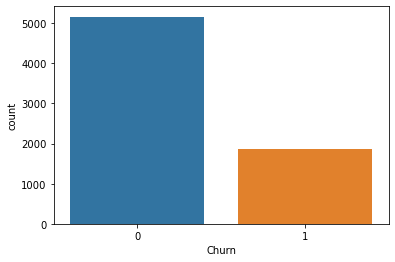

In [344]:
sns.countplot(x='Churn',data=telco_df)

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [346]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)
y_resampled.value_counts()

0    3608
1    3608
Name: Churn, dtype: int64

In [347]:
train = pd.concat([X_resampled,y_resampled],axis=1)

In [348]:
test_set = pd.concat([X_test,y_test],axis=1)

In [349]:
predictor = TabularPredictor(label='Churn',eval_metric='roc_auc').fit(train_data=train)

No path specified. Models will be saved in: "AutogluonModels/ag-20220519_095548\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220519_095548\"
AutoGluon Version:  0.4.0
Python Version:     3.9.7
Operating System:   Windows
Train Data Rows:    7216
Train Data Columns: 17
Label Column: Churn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    9330.94 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each featu

In [350]:
predictor.leaderboard(test_set,silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.830990,0.927721,0.027925,0.010964,1.168037,0.027925,0.010964,1.168037,1,True,11
1,CatBoost,0.825996,0.929394,0.006001,0.001995,4.138535,0.006001,0.001995,4.138535,1,True,7
2,LightGBMXT,0.825746,0.917297,0.038897,0.012966,0.849724,0.038897,0.012966,0.849724,1,True,3
3,LightGBMLarge,0.824915,0.920412,0.042886,0.010010,1.451950,0.042886,0.010010,1.451950,1,True,13
4,LightGBM,0.824648,0.928296,0.043883,0.010969,0.900219,0.043883,0.010969,0.900219,1,True,4
5,WeightedEnsemble_L2,0.821013,0.938310,0.116701,0.030900,7.516248,0.015957,0.000998,1.298473,2,True,14
6,RandomForestEntr,0.816865,0.910168,0.153588,0.062832,0.814302,0.153588,0.062832,0.814302,1,True,6
7,RandomForestGini,0.814977,0.905783,0.167054,0.061835,0.759887,0.167054,0.061835,0.759887,1,True,5
8,ExtraTreesEntr,0.808110,0.905622,0.170411,0.065934,0.697710,0.170411,0.065934,0.697710,1,True,9
9,ExtraTreesGini,0.807891,0.905629,0.220412,0.063875,0.695221,0.220412,0.063875,0.695221,1,True,8


In [351]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
sm = SMOTE(sampling_strategy = 0.8, k_neighbors=5, random_state=5)
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)
y_resampled.value_counts()
train = pd.concat([X_resampled,y_resampled],axis=1)
test_set = pd.concat([X_test,y_test],axis=1)
predictor = TabularPredictor(label='Churn',eval_metric='roc_auc').fit(train_data=train)

No path specified. Models will be saved in: "AutogluonModels/ag-20220519_095636\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220519_095636\"
AutoGluon Version:  0.4.0
Python Version:     3.9.7
Operating System:   Windows
Train Data Rows:    6494
Train Data Columns: 17
Label Column: Churn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    9386.61 MB
	Train Data (Original)  Memory Usage: 0.88 MB (0.0% of available memory)
	Inferring data type of each featu

In [352]:
predictor.leaderboard(test_set,silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.835003,0.910648,0.019946,0.009003,0.648659,0.019946,0.009003,0.648659,1,True,4
1,XGBoost,0.832091,0.916332,0.020942,0.010971,1.136455,0.020942,0.010971,1.136455,1,True,11
2,CatBoost,0.828459,0.918733,0.004988,0.002994,3.715600,0.004988,0.002994,3.715600,1,True,7
3,LightGBMXT,0.826245,0.900287,0.040890,0.014959,0.825277,0.040890,0.014959,0.825277,1,True,3
4,LightGBMLarge,0.825822,0.899716,0.034907,0.009951,1.303564,0.034907,0.009951,1.303564,1,True,13
5,WeightedEnsemble_L2,0.824168,0.925951,0.060839,0.022943,6.130723,0.015958,0.000999,1.270690,2,True,14
6,RandomForestGini,0.818537,0.889168,0.137633,0.061708,0.767098,0.137633,0.061708,0.767098,1,True,5
7,RandomForestEntr,0.818391,0.888852,0.202458,0.064013,0.738657,0.202458,0.064013,0.738657,1,True,6
8,NeuralNetTorch,0.813260,0.863806,0.054853,0.013963,21.876377,0.054853,0.013963,21.876377,1,True,12
9,ExtraTreesEntr,0.809399,0.890721,0.174228,0.060820,0.693932,0.174228,0.060820,0.693932,1,True,9


### PART VI : Model Constructing
According to the automl approach from AUTOGLUON library, the model would be compatibled to the existing data is shown below,
1. RandomForestClassifier 
2. GradientBosstingClassifier
3. AdaBoosting
4. XGBoosting
5. LightBoosting
6. CatBoosting

In [353]:
## Dataset preparation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
sm = SMOTE(sampling_strategy = 0.8, k_neighbors=5, random_state=5)
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

#### I : RANDOM FOREST CLASSIFIER 

In [354]:
## Before Oversampling Technique
rf = RandomForestClassifier(n_estimators=72, criterion="gini", random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=72, random_state=0)

In [355]:
rf_pred = rf.predict(X_test)
rf_pred_prob_bef = rf.predict_proba(np.array(X_test.values))[:,1]
print(classification_report(y_test,rf_pred))
print("Roc_Auc_score :",roc_auc_score(y_test,rf_pred_prob_bef))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1555
           1       0.60      0.46      0.52       555

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110

Roc_Auc_score : 0.8136965904811564


C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [356]:
## After Oversampling Technique
rf = RandomForestClassifier(n_estimators=72, criterion="gini", random_state=0)
rf.fit(X_resampled,y_resampled)

RandomForestClassifier(n_estimators=72, random_state=0)

In [357]:
rf_pred = rf.predict(X_test)
rf_pred_prob = rf.predict_proba(np.array(X_test.values))[:,1]
print(classification_report(y_test,rf_pred))
print("Roc_Auc_score :",roc_auc_score(y_test,rf_pred_prob))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1555
           1       0.57      0.55      0.56       555

    accuracy                           0.77      2110
   macro avg       0.71      0.70      0.70      2110
weighted avg       0.77      0.77      0.77      2110

Roc_Auc_score : 0.8142521943165031


C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [358]:
## Fine Tune Model + Oversampling Technique
rf_param_grid = {'criterion' : ['gini','entropy'],
                 'n_estimators': [80,100,200],
                 'max_depth': [1,2,4]}
rf_grid = GridSearchCV(RandomForestClassifier(), 
                    param_grid = rf_param_grid, 
                    cv = 4, scoring = "roc_auc", n_jobs = 6, verbose = 1)

rf_grid.fit(X_resampled,y_resampled)
print(rf_grid.best_estimator_)
print(rf_grid.best_score_)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=200)
0.8693424546851041


In [359]:
## After Fine Tune Model + Oversampling Technique
best_rf = rf_grid.best_estimator_.fit(X_resampled, y_resampled)

prob_rf = best_rf.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,prob_rf )

C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8339184844007994

#### II : GradientBosstingClassifier

In [360]:
## Before Oversampling Technique
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [361]:
gb_pred = gb.predict(X_test)
gb_pred_prob_bef = gb.predict_proba(np.array(X_test.values))[:,1]
print(classification_report(y_test,gb_pred))
print("Roc_Auc_score :",roc_auc_score(y_test,gb_pred_prob_bef))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.66      0.51      0.58       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Roc_Auc_score : 0.84038990759248


C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [362]:
## After Oversampling Technique
gb = GradientBoostingClassifier()
gb.fit(X_resampled,y_resampled)

GradientBoostingClassifier()

In [363]:
gb_pred = gb.predict(X_test)
gb_pred_prob = gb.predict_proba(np.array(X_test.values))[:,1]
print(classification_report(y_test,gb_pred))
print("Roc_Auc_score :",roc_auc_score(y_test,gb_pred_prob))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1555
           1       0.57      0.68      0.62       555

    accuracy                           0.78      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.80      0.78      0.79      2110

Roc_Auc_score : 0.8371831638712668


C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [364]:
## Fine Tune Model + Oversampling Technique
gb_param_grid = {'loss' : ['deviance'],
                 'n_estimators': [10,100,200,500],
                 'max_depth': [1,2,4,5]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), 
                    param_grid = gb_param_grid, 
                    cv = 4, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gb_grid.fit(X_resampled,y_resampled)
print(gb_grid.best_estimator_)
print(gb_grid.best_score_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
GradientBoostingClassifier(max_depth=2, n_estimators=500)
0.9123373647103266


In [365]:
best_gb = gb_grid.best_estimator_.fit(X_resampled, y_resampled)

prob_gb = best_gb.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,prob_gb )

C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.8329706555430029

#### III : AdaBoost

In [366]:
## Before Oversampling Technique
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [367]:
ada_pred = ada.predict(X_test)
ada_pred_prob_bef = ada.predict_proba(np.array(X_test.values))[:,1]
print(classification_report(y_test,ada_pred))
print("Roc_Auc_score :",roc_auc_score(y_test,ada_pred_prob_bef))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1555
           1       0.63      0.52      0.57       555

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.72      2110
weighted avg       0.78      0.79      0.79      2110

Roc_Auc_score : 0.8369317227195041


C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [368]:
## After Oversampling Technique
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_resampled,y_resampled)

AdaBoostClassifier(n_estimators=100)

In [369]:
ada_pred = ada.predict(X_test)
ada_pred_prob = ada.predict_proba(np.array(X_test.values))[:,1]
print(classification_report(y_test,ada_pred))
print("Roc_Auc_score :",roc_auc_score(y_test,ada_pred_prob))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1555
           1       0.57      0.70      0.63       555

    accuracy                           0.78      2110
   macro avg       0.73      0.76      0.74      2110
weighted avg       0.80      0.78      0.79      2110

Roc_Auc_score : 0.8398899220764172


C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [370]:
## Fine Tune Model + Oversampling Technique
ABC_param_grid = {"n_estimators" :[10,50,100],
                  "learning_rate":  [0.001, 0.01]}

ada_grid = GridSearchCV(AdaBoostClassifier(), 
                     param_grid = ABC_param_grid,
                     cv = 4, scoring = "roc_auc", n_jobs = 6, verbose = 1)

ada_grid.fit(X_resampled,y_resampled)
print(ada_grid.best_estimator_)
print(ada_grid.best_score_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
AdaBoostClassifier(learning_rate=0.01, n_estimators=100)
0.8088753013000252


In [371]:
best_ada = ada_grid.best_estimator_.fit(X_resampled, y_resampled)

prob_ada = best_ada.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,prob_ada)

C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.775274180933345

#### IV : XGBoost

In [372]:
## Before Oversampling Technique
xg = xgb.XGBClassifier()
xg.fit(X_train,y_train)

C:\Users\warintorn.nawong13\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [373]:
xg_pred = xg.predict(X_test)
xg_pred_prob_bef = xg.predict_proba(np.array(X_test.values))[:,1]
print(classification_report(y_test,xg_pred))
print("Roc_Auc_score :",roc_auc_score(y_test,xg_pred_prob_bef))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1555
           1       0.62      0.52      0.57       555

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Roc_Auc_score : 0.822537006459836


In [374]:
## After Oversampling Technique
xg = xgb.XGBClassifier()
xg.fit(X_resampled,y_resampled)

[16:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\warintorn.nawong13\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [375]:
xg_pred = xg.predict(X_test)
xg_pred_prob = xg.predict_proba(np.array(X_test.values))[:,1]
print(classification_report(y_test,xg_pred))
print("Roc_Auc_score :",roc_auc_score(y_test,xg_pred_prob))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1555
           1       0.58      0.59      0.58       555

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110

Roc_Auc_score : 0.8210353118391702


In [376]:
params_XGB = [{
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.01,0.03,0.1],
}]

xg_grid = GridSearchCV(xgb.XGBClassifier(), 
                     param_grid = params_XGB,
                     cv = 4, scoring = "roc_auc", n_jobs = 6, verbose = 1)

xg_grid.fit(X_resampled,y_resampled)
print(xg_grid.best_estimator_)
print(xg_grid.best_score_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


C:\Users\warintorn.nawong13\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:58:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.9090381622327484


In [377]:
best_xg = xg_grid.best_estimator_.fit(X_resampled, y_resampled)

prob_xg = best_xg.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,prob_xg)

[16:58:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8327226905361953

#### V : LightBoosting

In [378]:
## Before Oversampling Technique
lgb = lgbm.LGBMClassifier()
lgb.fit(X_train,y_train)

LGBMClassifier()

In [379]:
lgb_pred = lgb.predict(X_test)
lgb_pred_prob_bef = lgb.predict_proba(np.array(X_test.values))[:,1]
print(classification_report(y_test,lgb_pred))
print("Roc_Auc_score :",roc_auc_score(y_test,lgb_pred_prob_bef))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.52      0.58       555

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Roc_Auc_score : 0.8339601981402625


In [380]:
## After Oversampling Technique
lgb = lgbm.LGBMClassifier()
lgb.fit(X_resampled,y_resampled)

LGBMClassifier()

In [381]:
lgb_pred = lgb.predict(X_test)
lgb_pred_prob = lgb.predict_proba(np.array(X_test.values))[:,1]
print(classification_report(y_test,lgb_pred))
print("Roc_Auc_score :",roc_auc_score(y_test,lgb_pred_prob))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1555
           1       0.58      0.59      0.58       555

    accuracy                           0.78      2110
   macro avg       0.71      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110

Roc_Auc_score : 0.8309440630340952


In [382]:
## Fine Tune Model + Oversampling Technique
lgb_grid = GridSearchCV(lgbm.LGBMClassifier(), 
                                param_grid={'scale_pos_weight':[1,2,6]},
                                scoring='roc_auc',
                                cv=4,
                                refit=True,
                                verbose=True)
lgb_grid.fit(X_resampled,y_resampled)
print(lgb_grid.best_estimator_)
print(lgb_grid.best_score_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
LGBMClassifier(scale_pos_weight=1)
0.90895550808677


In [383]:
best_lgb = lgb_grid.best_estimator_.fit(X_resampled, y_resampled)

prob_lgb = best_lgb.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,prob_lgb)

0.8309440630340952

#### VI : CATBoosting

In [384]:
## Before Oversampling Technique
cbc = cb.CatBoostClassifier()
cbc.fit(X_train,y_train)

Learning rate set to 0.020346
0:	learn: 0.6794363	total: 3.17ms	remaining: 3.17s
1:	learn: 0.6658417	total: 6.47ms	remaining: 3.23s
2:	learn: 0.6555794	total: 23.8ms	remaining: 7.9s
3:	learn: 0.6432178	total: 26.9ms	remaining: 6.71s
4:	learn: 0.6328814	total: 29.2ms	remaining: 5.82s
5:	learn: 0.6217821	total: 32.3ms	remaining: 5.36s
6:	learn: 0.6118038	total: 35.5ms	remaining: 5.04s
7:	learn: 0.6025028	total: 38.9ms	remaining: 4.82s
8:	learn: 0.5925916	total: 42.1ms	remaining: 4.63s
9:	learn: 0.5843324	total: 45.4ms	remaining: 4.49s
10:	learn: 0.5756586	total: 48.7ms	remaining: 4.38s
11:	learn: 0.5673802	total: 52ms	remaining: 4.28s
12:	learn: 0.5599507	total: 70.6ms	remaining: 5.36s
13:	learn: 0.5530769	total: 73.8ms	remaining: 5.2s
14:	learn: 0.5463461	total: 86.2ms	remaining: 5.66s
15:	learn: 0.5405298	total: 89.4ms	remaining: 5.5s
16:	learn: 0.5349252	total: 101ms	remaining: 5.81s
17:	learn: 0.5290509	total: 104ms	remaining: 5.66s
18:	learn: 0.5234925	total: 107ms	remaining: 5.51s


171:	learn: 0.3853385	total: 714ms	remaining: 3.44s
172:	learn: 0.3851852	total: 718ms	remaining: 3.43s
173:	learn: 0.3850182	total: 721ms	remaining: 3.42s
174:	learn: 0.3848392	total: 725ms	remaining: 3.42s
175:	learn: 0.3847800	total: 742ms	remaining: 3.47s
176:	learn: 0.3845756	total: 748ms	remaining: 3.48s
177:	learn: 0.3842105	total: 754ms	remaining: 3.48s
178:	learn: 0.3841523	total: 757ms	remaining: 3.47s
179:	learn: 0.3839875	total: 762ms	remaining: 3.47s
180:	learn: 0.3838390	total: 765ms	remaining: 3.46s
181:	learn: 0.3836645	total: 769ms	remaining: 3.46s
182:	learn: 0.3834458	total: 772ms	remaining: 3.45s
183:	learn: 0.3833157	total: 783ms	remaining: 3.47s
184:	learn: 0.3832259	total: 786ms	remaining: 3.46s
185:	learn: 0.3830683	total: 789ms	remaining: 3.45s
186:	learn: 0.3829655	total: 792ms	remaining: 3.44s
187:	learn: 0.3828208	total: 795ms	remaining: 3.43s
188:	learn: 0.3826805	total: 798ms	remaining: 3.42s
189:	learn: 0.3824311	total: 801ms	remaining: 3.42s
190:	learn: 

355:	learn: 0.3609818	total: 1.84s	remaining: 3.33s
356:	learn: 0.3608987	total: 1.85s	remaining: 3.33s
357:	learn: 0.3607338	total: 1.85s	remaining: 3.32s
358:	learn: 0.3605937	total: 1.86s	remaining: 3.31s
359:	learn: 0.3605227	total: 1.88s	remaining: 3.33s
360:	learn: 0.3603460	total: 1.88s	remaining: 3.34s
361:	learn: 0.3602083	total: 1.89s	remaining: 3.34s
362:	learn: 0.3601456	total: 1.9s	remaining: 3.33s
363:	learn: 0.3600488	total: 1.91s	remaining: 3.33s
364:	learn: 0.3598107	total: 1.91s	remaining: 3.32s
365:	learn: 0.3596576	total: 1.91s	remaining: 3.31s
366:	learn: 0.3595923	total: 1.94s	remaining: 3.34s
367:	learn: 0.3595365	total: 1.95s	remaining: 3.34s
368:	learn: 0.3592988	total: 1.96s	remaining: 3.35s
369:	learn: 0.3592015	total: 1.97s	remaining: 3.35s
370:	learn: 0.3591299	total: 1.97s	remaining: 3.34s
371:	learn: 0.3589654	total: 1.98s	remaining: 3.34s
372:	learn: 0.3589149	total: 1.98s	remaining: 3.33s
373:	learn: 0.3587727	total: 1.98s	remaining: 3.32s
374:	learn: 0

529:	learn: 0.3422783	total: 2.93s	remaining: 2.6s
530:	learn: 0.3422337	total: 2.94s	remaining: 2.6s
531:	learn: 0.3421870	total: 2.94s	remaining: 2.59s
532:	learn: 0.3420891	total: 2.95s	remaining: 2.58s
533:	learn: 0.3420605	total: 2.96s	remaining: 2.58s
534:	learn: 0.3420062	total: 2.96s	remaining: 2.58s
535:	learn: 0.3419538	total: 2.97s	remaining: 2.57s
536:	learn: 0.3418396	total: 2.98s	remaining: 2.57s
537:	learn: 0.3416872	total: 2.98s	remaining: 2.56s
538:	learn: 0.3416343	total: 2.99s	remaining: 2.56s
539:	learn: 0.3415314	total: 2.99s	remaining: 2.55s
540:	learn: 0.3414719	total: 3s	remaining: 2.54s
541:	learn: 0.3413809	total: 3s	remaining: 2.54s
542:	learn: 0.3413515	total: 3s	remaining: 2.53s
543:	learn: 0.3411971	total: 3.02s	remaining: 2.53s
544:	learn: 0.3411685	total: 3.03s	remaining: 2.53s
545:	learn: 0.3410670	total: 3.04s	remaining: 2.53s
546:	learn: 0.3409929	total: 3.04s	remaining: 2.52s
547:	learn: 0.3409464	total: 3.05s	remaining: 2.51s
548:	learn: 0.3408625	t

708:	learn: 0.3262866	total: 4.04s	remaining: 1.66s
709:	learn: 0.3262450	total: 4.04s	remaining: 1.65s
710:	learn: 0.3261160	total: 4.05s	remaining: 1.65s
711:	learn: 0.3260636	total: 4.06s	remaining: 1.64s
712:	learn: 0.3259136	total: 4.06s	remaining: 1.64s
713:	learn: 0.3258472	total: 4.07s	remaining: 1.63s
714:	learn: 0.3257738	total: 4.07s	remaining: 1.62s
715:	learn: 0.3256357	total: 4.08s	remaining: 1.62s
716:	learn: 0.3255459	total: 4.08s	remaining: 1.61s
717:	learn: 0.3254259	total: 4.09s	remaining: 1.61s
718:	learn: 0.3253612	total: 4.09s	remaining: 1.6s
719:	learn: 0.3252288	total: 4.1s	remaining: 1.59s
720:	learn: 0.3251183	total: 4.1s	remaining: 1.59s
721:	learn: 0.3250145	total: 4.1s	remaining: 1.58s
722:	learn: 0.3249363	total: 4.11s	remaining: 1.57s
723:	learn: 0.3247945	total: 4.11s	remaining: 1.57s
724:	learn: 0.3247160	total: 4.11s	remaining: 1.56s
725:	learn: 0.3246104	total: 4.13s	remaining: 1.56s
726:	learn: 0.3245290	total: 4.14s	remaining: 1.55s
727:	learn: 0.32

887:	learn: 0.3105839	total: 5.18s	remaining: 654ms
888:	learn: 0.3104998	total: 5.2s	remaining: 649ms
889:	learn: 0.3104031	total: 5.2s	remaining: 643ms
890:	learn: 0.3103178	total: 5.21s	remaining: 637ms
891:	learn: 0.3102627	total: 5.21s	remaining: 631ms
892:	learn: 0.3101745	total: 5.22s	remaining: 625ms
893:	learn: 0.3100785	total: 5.22s	remaining: 619ms
894:	learn: 0.3099893	total: 5.22s	remaining: 613ms
895:	learn: 0.3099160	total: 5.23s	remaining: 607ms
896:	learn: 0.3097933	total: 5.23s	remaining: 601ms
897:	learn: 0.3096837	total: 5.23s	remaining: 594ms
898:	learn: 0.3096055	total: 5.24s	remaining: 588ms
899:	learn: 0.3095641	total: 5.24s	remaining: 582ms
900:	learn: 0.3094627	total: 5.24s	remaining: 576ms
901:	learn: 0.3093967	total: 5.25s	remaining: 570ms
902:	learn: 0.3093264	total: 5.25s	remaining: 564ms
903:	learn: 0.3092792	total: 5.25s	remaining: 558ms
904:	learn: 0.3091872	total: 5.25s	remaining: 552ms
905:	learn: 0.3091146	total: 5.26s	remaining: 546ms
906:	learn: 0.

In [385]:
cbc_pred = cbc.predict(X_test)
cbc_pred_prob_bef = cbc.predict_proba(np.array(X_test.values))[:,1]
print(classification_report(y_test,cbc_pred))
print("Roc_Auc_score :",roc_auc_score(y_test,cbc_pred_prob_bef))

              precision    recall  f1-score   support

           0       0.84      0.90      0.86      1555
           1       0.64      0.51      0.56       555

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.79      2110

Roc_Auc_score : 0.8355030271428986


In [386]:
## After Oversampling Technique
cbc = cb.CatBoostClassifier()
cbc.fit(X_resampled,y_resampled)

Learning rate set to 0.022902
0:	learn: 0.6796488	total: 17.6ms	remaining: 17.5s
1:	learn: 0.6685825	total: 30.3ms	remaining: 15.1s
2:	learn: 0.6580592	total: 41.7ms	remaining: 13.9s
3:	learn: 0.6478496	total: 50.2ms	remaining: 12.5s
4:	learn: 0.6381892	total: 56.4ms	remaining: 11.2s
5:	learn: 0.6277974	total: 61.3ms	remaining: 10.1s
6:	learn: 0.6184023	total: 66ms	remaining: 9.37s
7:	learn: 0.6098366	total: 70.1ms	remaining: 8.69s
8:	learn: 0.6009203	total: 73.9ms	remaining: 8.14s
9:	learn: 0.5941031	total: 77.1ms	remaining: 7.63s
10:	learn: 0.5865766	total: 80.5ms	remaining: 7.24s
11:	learn: 0.5797857	total: 84.3ms	remaining: 6.94s
12:	learn: 0.5730368	total: 87.8ms	remaining: 6.67s
13:	learn: 0.5661488	total: 91.4ms	remaining: 6.44s
14:	learn: 0.5603769	total: 94.8ms	remaining: 6.22s
15:	learn: 0.5550214	total: 98.5ms	remaining: 6.05s
16:	learn: 0.5498986	total: 102ms	remaining: 5.9s
17:	learn: 0.5441805	total: 105ms	remaining: 5.75s
18:	learn: 0.5396790	total: 109ms	remaining: 5.62

179:	learn: 0.3783721	total: 705ms	remaining: 3.21s
180:	learn: 0.3781728	total: 709ms	remaining: 3.21s
181:	learn: 0.3779834	total: 714ms	remaining: 3.21s
182:	learn: 0.3776917	total: 718ms	remaining: 3.21s
183:	learn: 0.3774724	total: 722ms	remaining: 3.2s
184:	learn: 0.3771668	total: 726ms	remaining: 3.2s
185:	learn: 0.3769164	total: 730ms	remaining: 3.19s
186:	learn: 0.3766733	total: 734ms	remaining: 3.19s
187:	learn: 0.3764361	total: 738ms	remaining: 3.19s
188:	learn: 0.3760539	total: 742ms	remaining: 3.18s
189:	learn: 0.3758367	total: 746ms	remaining: 3.18s
190:	learn: 0.3755308	total: 750ms	remaining: 3.18s
191:	learn: 0.3752525	total: 754ms	remaining: 3.17s
192:	learn: 0.3750557	total: 759ms	remaining: 3.17s
193:	learn: 0.3749133	total: 764ms	remaining: 3.17s
194:	learn: 0.3748019	total: 768ms	remaining: 3.17s
195:	learn: 0.3745561	total: 774ms	remaining: 3.17s
196:	learn: 0.3743492	total: 779ms	remaining: 3.18s
197:	learn: 0.3739847	total: 786ms	remaining: 3.18s
198:	learn: 0.

349:	learn: 0.3458364	total: 1.39s	remaining: 2.58s
350:	learn: 0.3457369	total: 1.39s	remaining: 2.57s
351:	learn: 0.3454499	total: 1.4s	remaining: 2.57s
352:	learn: 0.3453632	total: 1.4s	remaining: 2.56s
353:	learn: 0.3451650	total: 1.4s	remaining: 2.56s
354:	learn: 0.3450586	total: 1.41s	remaining: 2.56s
355:	learn: 0.3448567	total: 1.41s	remaining: 2.55s
356:	learn: 0.3446118	total: 1.41s	remaining: 2.54s
357:	learn: 0.3444703	total: 1.42s	remaining: 2.54s
358:	learn: 0.3442688	total: 1.42s	remaining: 2.54s
359:	learn: 0.3441636	total: 1.42s	remaining: 2.53s
360:	learn: 0.3438299	total: 1.43s	remaining: 2.53s
361:	learn: 0.3435967	total: 1.43s	remaining: 2.52s
362:	learn: 0.3435143	total: 1.44s	remaining: 2.52s
363:	learn: 0.3434289	total: 1.44s	remaining: 2.51s
364:	learn: 0.3433305	total: 1.44s	remaining: 2.51s
365:	learn: 0.3432310	total: 1.45s	remaining: 2.5s
366:	learn: 0.3430609	total: 1.45s	remaining: 2.5s
367:	learn: 0.3428147	total: 1.45s	remaining: 2.49s
368:	learn: 0.342

512:	learn: 0.3198172	total: 1.96s	remaining: 1.86s
513:	learn: 0.3197324	total: 1.96s	remaining: 1.85s
514:	learn: 0.3196442	total: 1.97s	remaining: 1.85s
515:	learn: 0.3195400	total: 1.97s	remaining: 1.85s
516:	learn: 0.3194383	total: 1.97s	remaining: 1.84s
517:	learn: 0.3193280	total: 1.98s	remaining: 1.84s
518:	learn: 0.3191272	total: 1.98s	remaining: 1.84s
519:	learn: 0.3189059	total: 1.98s	remaining: 1.83s
520:	learn: 0.3187603	total: 1.99s	remaining: 1.83s
521:	learn: 0.3186815	total: 1.99s	remaining: 1.82s
522:	learn: 0.3185522	total: 2s	remaining: 1.82s
523:	learn: 0.3183983	total: 2s	remaining: 1.81s
524:	learn: 0.3183070	total: 2s	remaining: 1.81s
525:	learn: 0.3182261	total: 2s	remaining: 1.81s
526:	learn: 0.3180861	total: 2.01s	remaining: 1.8s
527:	learn: 0.3179905	total: 2.01s	remaining: 1.8s
528:	learn: 0.3179122	total: 2.02s	remaining: 1.79s
529:	learn: 0.3178176	total: 2.02s	remaining: 1.79s
530:	learn: 0.3176180	total: 2.02s	remaining: 1.79s
531:	learn: 0.3175193	tota

699:	learn: 0.2997734	total: 2.64s	remaining: 1.13s
700:	learn: 0.2996586	total: 2.64s	remaining: 1.13s
701:	learn: 0.2995686	total: 2.65s	remaining: 1.12s
702:	learn: 0.2994888	total: 2.65s	remaining: 1.12s
703:	learn: 0.2993742	total: 2.65s	remaining: 1.12s
704:	learn: 0.2993031	total: 2.66s	remaining: 1.11s
705:	learn: 0.2991763	total: 2.66s	remaining: 1.11s
706:	learn: 0.2990741	total: 2.67s	remaining: 1.1s
707:	learn: 0.2990071	total: 2.67s	remaining: 1.1s
708:	learn: 0.2988875	total: 2.67s	remaining: 1.1s
709:	learn: 0.2988120	total: 2.68s	remaining: 1.09s
710:	learn: 0.2986633	total: 2.68s	remaining: 1.09s
711:	learn: 0.2985264	total: 2.68s	remaining: 1.08s
712:	learn: 0.2984286	total: 2.69s	remaining: 1.08s
713:	learn: 0.2983986	total: 2.69s	remaining: 1.08s
714:	learn: 0.2982675	total: 2.69s	remaining: 1.07s
715:	learn: 0.2981842	total: 2.7s	remaining: 1.07s
716:	learn: 0.2980759	total: 2.7s	remaining: 1.06s
717:	learn: 0.2979561	total: 2.7s	remaining: 1.06s
718:	learn: 0.2978

904:	learn: 0.2812286	total: 3.36s	remaining: 353ms
905:	learn: 0.2811612	total: 3.37s	remaining: 349ms
906:	learn: 0.2810915	total: 3.37s	remaining: 345ms
907:	learn: 0.2810491	total: 3.37s	remaining: 342ms
908:	learn: 0.2809826	total: 3.38s	remaining: 338ms
909:	learn: 0.2808913	total: 3.38s	remaining: 335ms
910:	learn: 0.2808370	total: 3.39s	remaining: 331ms
911:	learn: 0.2807205	total: 3.4s	remaining: 328ms
912:	learn: 0.2806820	total: 3.4s	remaining: 324ms
913:	learn: 0.2806297	total: 3.41s	remaining: 321ms
914:	learn: 0.2805066	total: 3.41s	remaining: 317ms
915:	learn: 0.2804566	total: 3.42s	remaining: 313ms
916:	learn: 0.2803955	total: 3.42s	remaining: 310ms
917:	learn: 0.2803077	total: 3.42s	remaining: 306ms
918:	learn: 0.2802296	total: 3.43s	remaining: 302ms
919:	learn: 0.2801440	total: 3.43s	remaining: 298ms
920:	learn: 0.2800277	total: 3.44s	remaining: 295ms
921:	learn: 0.2799408	total: 3.44s	remaining: 291ms
922:	learn: 0.2798620	total: 3.44s	remaining: 287ms
923:	learn: 0.

In [387]:
cbc_pred = cbc.predict(X_test)
cbc_pred_prob = cbc.predict_proba(np.array(X_test.values))[:,1]
print(classification_report(y_test,cbc_pred))
print("Roc_Auc_score :",roc_auc_score(y_test,cbc_pred_prob))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1555
           1       0.59      0.60      0.59       555

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.79      0.78      0.78      2110

Roc_Auc_score : 0.8327087859563744


In [388]:
## Fine Tune Model + Oversampling Technique
cbc_grid = GridSearchCV(cb.CatBoostClassifier(), 
                                param_grid={'iterations':[10,50,100]},
                                scoring='roc_auc',
                                cv=4,
                                refit=True,
                                verbose=True)
cbc_grid.fit(X_resampled,y_resampled)
print(cbc_grid.best_estimator_)
print(cbc_grid.best_score_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
Learning rate set to 0.5
0:	learn: 0.5515145	total: 8.91ms	remaining: 80.2ms
1:	learn: 0.4947927	total: 11.4ms	remaining: 45.6ms
2:	learn: 0.4643204	total: 13.9ms	remaining: 32.4ms
3:	learn: 0.4387864	total: 16.3ms	remaining: 24.4ms
4:	learn: 0.4254404	total: 18.6ms	remaining: 18.6ms
5:	learn: 0.4099537	total: 21.2ms	remaining: 14.1ms
6:	learn: 0.3982972	total: 24.1ms	remaining: 10.3ms
7:	learn: 0.3937536	total: 26.8ms	remaining: 6.7ms
8:	learn: 0.3900138	total: 29.1ms	remaining: 3.24ms
9:	learn: 0.3862826	total: 31.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5521370	total: 2.93ms	remaining: 26.4ms
1:	learn: 0.5027241	total: 5.82ms	remaining: 23.3ms
2:	learn: 0.4671979	total: 8.37ms	remaining: 19.5ms
3:	learn: 0.4466203	total: 11ms	remaining: 16.4ms
4:	learn: 0.4232838	total: 13.8ms	remaining: 13.8ms
5:	learn: 0.4149705	total: 16.5ms	remaining: 11ms
6:	learn: 0.4028365	total: 19.4ms	remaining: 8.33ms
7:	learn: 0.39

Learning rate set to 0.31593
0:	learn: 0.6020293	total: 8.16ms	remaining: 400ms
1:	learn: 0.5576392	total: 15.9ms	remaining: 381ms
2:	learn: 0.5253417	total: 23.5ms	remaining: 368ms
3:	learn: 0.5024490	total: 31.5ms	remaining: 363ms
4:	learn: 0.4868928	total: 37.3ms	remaining: 336ms
5:	learn: 0.4746982	total: 41.8ms	remaining: 306ms
6:	learn: 0.4622361	total: 46.1ms	remaining: 283ms
7:	learn: 0.4550474	total: 49.3ms	remaining: 259ms
8:	learn: 0.4499519	total: 52.8ms	remaining: 241ms
9:	learn: 0.4449510	total: 55.6ms	remaining: 222ms
10:	learn: 0.4410908	total: 58.4ms	remaining: 207ms
11:	learn: 0.4383973	total: 60.9ms	remaining: 193ms
12:	learn: 0.4355355	total: 63.3ms	remaining: 180ms
13:	learn: 0.4311037	total: 65.8ms	remaining: 169ms
14:	learn: 0.4287364	total: 67.8ms	remaining: 158ms
15:	learn: 0.4266848	total: 69.9ms	remaining: 149ms
16:	learn: 0.4246147	total: 71.9ms	remaining: 140ms
17:	learn: 0.4221464	total: 74.2ms	remaining: 132ms
18:	learn: 0.4202498	total: 76.4ms	remaining:

57:	learn: 0.3426202	total: 165ms	remaining: 120ms
58:	learn: 0.3412116	total: 168ms	remaining: 117ms
59:	learn: 0.3399013	total: 170ms	remaining: 113ms
60:	learn: 0.3372765	total: 172ms	remaining: 110ms
61:	learn: 0.3360372	total: 174ms	remaining: 107ms
62:	learn: 0.3351734	total: 177ms	remaining: 104ms
63:	learn: 0.3347106	total: 179ms	remaining: 101ms
64:	learn: 0.3325876	total: 181ms	remaining: 97.7ms
65:	learn: 0.3306012	total: 184ms	remaining: 94.7ms
66:	learn: 0.3301364	total: 186ms	remaining: 91.6ms
67:	learn: 0.3291016	total: 188ms	remaining: 88.5ms
68:	learn: 0.3284627	total: 190ms	remaining: 85.5ms
69:	learn: 0.3276785	total: 193ms	remaining: 82.5ms
70:	learn: 0.3267752	total: 195ms	remaining: 79.5ms
71:	learn: 0.3260818	total: 197ms	remaining: 76.5ms
72:	learn: 0.3251116	total: 199ms	remaining: 73.6ms
73:	learn: 0.3245526	total: 201ms	remaining: 70.6ms
74:	learn: 0.3233254	total: 203ms	remaining: 67.8ms
75:	learn: 0.3220957	total: 205ms	remaining: 64.9ms
76:	learn: 0.321259

64:	learn: 0.3937994	total: 167ms	remaining: 90.2ms
65:	learn: 0.3930220	total: 170ms	remaining: 87.4ms
66:	learn: 0.3921250	total: 172ms	remaining: 84.6ms
67:	learn: 0.3916562	total: 174ms	remaining: 81.9ms
68:	learn: 0.3911666	total: 176ms	remaining: 79.1ms
69:	learn: 0.3896365	total: 178ms	remaining: 76.5ms
70:	learn: 0.3893848	total: 181ms	remaining: 73.7ms
71:	learn: 0.3882825	total: 183ms	remaining: 71ms
72:	learn: 0.3875489	total: 185ms	remaining: 68.5ms
73:	learn: 0.3863602	total: 187ms	remaining: 65.8ms
74:	learn: 0.3857901	total: 190ms	remaining: 63.2ms
75:	learn: 0.3850048	total: 192ms	remaining: 60.5ms
76:	learn: 0.3843341	total: 194ms	remaining: 57.9ms
77:	learn: 0.3837073	total: 196ms	remaining: 55.2ms
78:	learn: 0.3825684	total: 198ms	remaining: 52.6ms
79:	learn: 0.3818731	total: 200ms	remaining: 50ms
80:	learn: 0.3812330	total: 202ms	remaining: 47.4ms
81:	learn: 0.3807350	total: 206ms	remaining: 45.1ms
82:	learn: 0.3795790	total: 208ms	remaining: 42.6ms
83:	learn: 0.378

In [389]:
best_cbc = cbc_grid.best_estimator_.fit(X_resampled, y_resampled)

prob_cbc = best_cbc.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,prob_cbc)

Learning rate set to 0.189181
0:	learn: 0.6313861	total: 9.12ms	remaining: 903ms
1:	learn: 0.5939376	total: 17.6ms	remaining: 864ms
2:	learn: 0.5620363	total: 27ms	remaining: 873ms
3:	learn: 0.5386851	total: 35.4ms	remaining: 849ms
4:	learn: 0.5174753	total: 42.3ms	remaining: 804ms
5:	learn: 0.5027568	total: 47.1ms	remaining: 738ms
6:	learn: 0.4888002	total: 51.7ms	remaining: 687ms
7:	learn: 0.4759239	total: 55.4ms	remaining: 637ms
8:	learn: 0.4670301	total: 59ms	remaining: 596ms
9:	learn: 0.4599059	total: 62ms	remaining: 558ms
10:	learn: 0.4528725	total: 64.9ms	remaining: 525ms
11:	learn: 0.4478306	total: 67.5ms	remaining: 495ms
12:	learn: 0.4440315	total: 70.7ms	remaining: 473ms
13:	learn: 0.4391505	total: 73.4ms	remaining: 451ms
14:	learn: 0.4348666	total: 75.9ms	remaining: 430ms
15:	learn: 0.4303971	total: 78.3ms	remaining: 411ms
16:	learn: 0.4274058	total: 81ms	remaining: 395ms
17:	learn: 0.4245906	total: 83.6ms	remaining: 381ms
18:	learn: 0.4212409	total: 86.4ms	remaining: 368ms


0.8358222531212885

## ROC CURVE

In [390]:
#Before Oversampling
rf_fpr_bef, rf_tpr_bef, rf_thresholds_bef = roc_curve(y_test,rf_pred_prob)
gb_fpr_bef, gb_tpr_bef, gb_thresholds_bef = roc_curve(y_test,gb_pred_prob)
xg_fpr_bef, xg_tpr_bef, xg_thresholds_bef = roc_curve(y_test,xg_pred_prob)
ada_fpr_bef, ada_tpr_bef, ada_thresholds_bef = roc_curve(y_test,ada_pred_prob)
lgb_fpr_bef, lgb_tpr_bef, lgb_thresholds_bef = roc_curve(y_test,lgb_pred_prob)
cbc_fpr_bef, cbc_tpr_bef, cbc_thresholds_bef = roc_curve(y_test,cbc_pred_prob)

In [391]:
#After Oversampling
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test,prob_rf)
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test,prob_gb)
xg_fpr, xg_tpr, xg_thresholds = roc_curve(y_test,prob_xg)
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test,prob_ada)
lgb_fpr, lgb_tpr, lgb_thresholds = roc_curve(y_test,prob_lgb)
cbc_fpr, cbc_tpr, cbc_thresholds = roc_curve(y_test,prob_cbc)

In [392]:
#fig, (ax1,ax2) = plt.subplots(2, 2)
#ax1.plot(rf_fpr_bef, rf_tpr_bef,label='rf_before_oversampling')
#ax1.plot(rf_fpr, rf_tpr,color='r',label='rf_after_oversampling_finetuning')
#ax1.plot([0,1], [0,1])
#plt.legend()

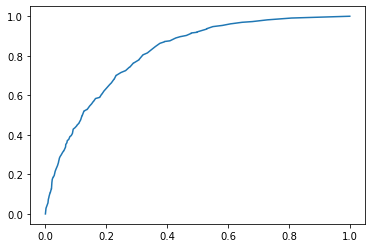

In [393]:
plt.plot(rf_fpr_bef, rf_tpr_bef)

In [394]:
def visualize_roc(g): 
    
    label = ['rf_before_oversampling','gb_before_oversampling','xg_before_oversampling','ada_before_oversampling',
            'lgb_before_oversampling','cbc_before_oversampling']
    label2 = ['rf_afer_oversampling_finetuning','gb_afer_oversampling_finetuning','xg_afer_oversampling_finetuning',
              'ada_afer_oversampling_finetuning','lgb_afer_oversampling_finetuning','cbc_afer_oversampling_finetuning']
    
    fpr_bef = [rf_fpr_bef,gb_fpr_bef,xg_fpr_bef,ada_fpr_bef,lgb_fpr_bef,cbc_fpr_bef]
    fpr = [rf_fpr,gb_fpr,xg_fpr,ada_fpr,lgb_fpr,cbc_fpr]
    tpr_bef = [rf_tpr_bef,gb_tpr_bef,xg_tpr_bef,ada_tpr_bef,lgb_tpr_bef,cbc_tpr_bef]
    tpr = [rf_tpr,gb_tpr,xg_tpr,ada_tpr,lgb_tpr,cbc_tpr]

    fig, axes = plt.subplots(3, 2,figsize=(15,10))
    j = 0
    k = 0
    for i in range(6):
        if i % 2 == 0:
            axes[j][0].plot(fpr_bef[i], tpr_bef[i],label=label[i])
            axes[j][0].plot(fpr[i], tpr[i],color='r',label=label2[i])
            axes[j][0].plot([0,1], [0,1])
            axes[j][0].legend()
            axes[j][0].set_xlabel('False Positive Rate')
            axes[j][0].set_ylabel('True Positive Rate')
            j = j +1

        if i % 2 == 1:
            axes[k][1].plot(fpr_bef[i], tpr_bef[i],label=label[i])
            axes[k][1].plot(fpr[i], tpr[i],color='r',label=label2[i])
            axes[k][1].plot([0,1], [0,1])
            axes[k][1].legend()
            axes[k][0].set_xlabel('False Positive Rate')
            axes[k][0].set_ylabel('True Positive Rate')
            k = k +1
g = 0

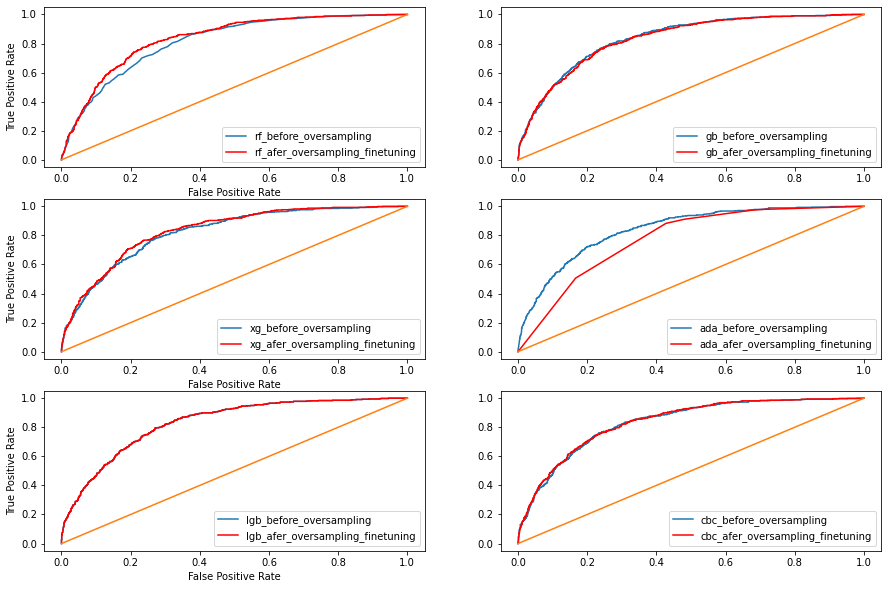

In [395]:
visualize_roc(g)

In [455]:
list1 = [best_rf.feature_importances_,best_gb.feature_importances_,best_xg.feature_importances_,
        best_ada.feature_importances_,best_lgb.feature_importances_/3000,best_cbc.feature_importances_ /100]
h = pd.DataFrame(list1,columns=X.columns)
h.index = ['rf','gb','xg','ada','lgb','cbc']
h = h.transpose()
h['All_approach'] = h.mean(axis=1)
h

,rf,gb,xg,ada,lgb,cbc,All_approach
SeniorCitizen,0.007617,0.000737,0.024991,0.00,0.021000,0.008923,0.010545
Partner,0.005884,0.004318,0.019590,0.00,0.028333,0.020534,0.013110
Dependents,0.009654,0.007679,0.023047,0.00,0.023333,0.014480,0.013032
tenure,0.164627,0.134399,0.033758,0.00,0.283667,0.195612,0.135344
PhoneService,0.000744,0.005946,0.025444,0.00,0.012333,0.008354,0.008804
MultipleLines,0.005058,0.005158,0.000000,0.00,0.000000,0.013673,0.003982
InternetService,0.079297,0.047889,0.076621,0.00,0.031000,0.134758,0.061594
OnlineSecurity,0.033606,0.021261,0.044252,0.00,0.031000,0.026699,0.026136
OnlineBackup,0.006402,0.008541,0.028852,0.00,0.026000,0.012641,0.013739
DeviceProtection,0.001405,0.006063,0.022442,0.00,0.023667,0.012912,0.011081


## FEATURE IMPORTANCE

In [515]:
def plot_feature(x):    
    fig, axes = plt.subplots(3, 2,figsize=(20,25))
    j = 0
    k = 0
    list3 = ['rf','gb','xg','ada','lgb','cbc']
    for i in range(len(list3)):

        if i % 2 == 0:
            a = h[list3[i]].sort_values(ascending=False)
            axes[j][0].barh(a.index,a)
            #axes[j][0].tick_params(axis='x', labelrotation=90)
            axes[j][0].set_title('Feature Importance of ' + list3[i])
            j = j+1

        if i % 2 == 1:
            b = h[list3[i]].sort_values(ascending=False)
            axes[k][1].barh(b.index,b)
            #axes[k][1].tick_params(axis='x', labelrotation=90)
            axes[k][1].set_title('Feature Importance of ' + list3[i])
            k = k+1
            
x = 0

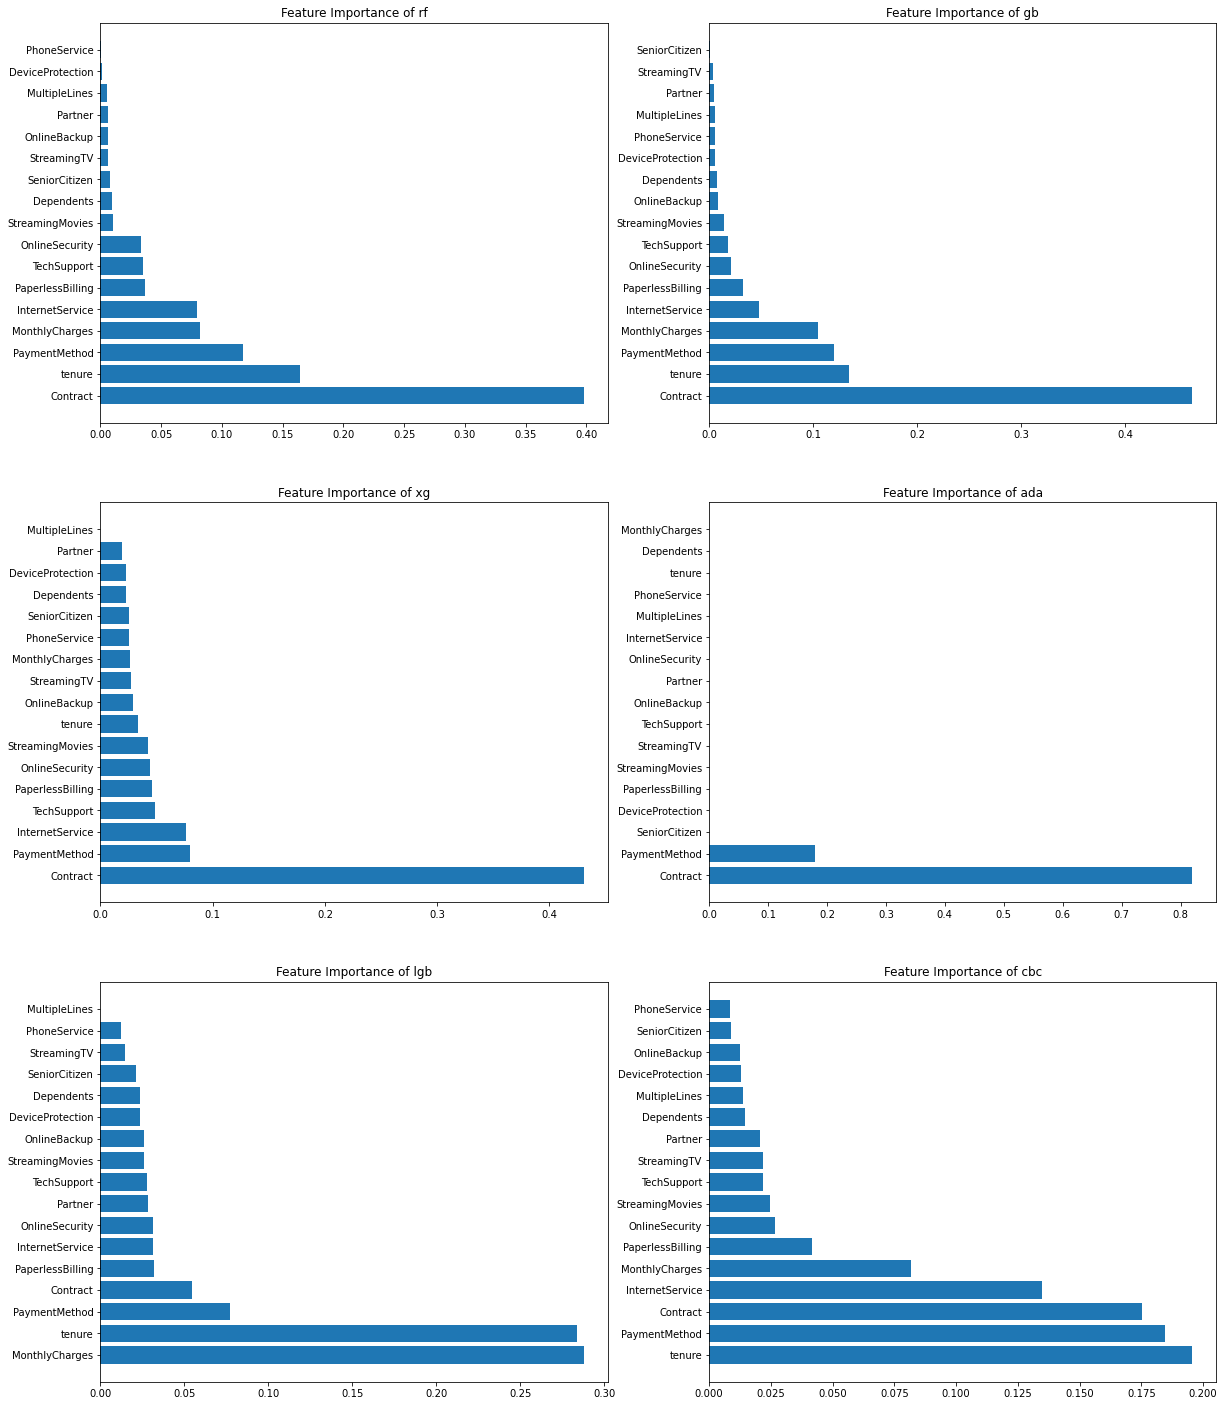

In [516]:
plot_feature(x)

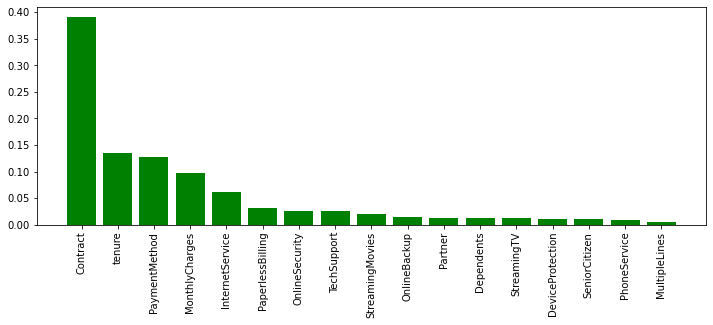

In [514]:
plt.figure(figsize=(12,4))
a = h['All_approach'].sort_values(ascending=False)
plt.bar(a.index,a,color='g')
plt.xticks(rotation=90)
plt.show()